<h1><center> Web Data Wizardry with Python  </center></h1>


# Vinicius Rodrigues Giannaccini 
# 11/21/2023

## Table of Contents

- [Introduction](#zero-bullet)
- [XML Parsing](#first-bullet)
- [Using an API](#second-bullet)
- [Web Scraping](#third-bullet)
- [References](#fourth-bullet)

## - [Introduction](#zero-bullet)

    Web data extraction and modification are critical tasks in the fields of data science and analytics. With an emphasis on HTML, XML, JSON parsing, and API interaction, Project 2 sets out to explore the possibilities of utilizing Python for web data collecting. This project explores three different tasks that combine technical expertise and creative exploration:

- **XML Parsing**: We extract useful information from XML sitemaps and use Python to traverse the HTML structure of webpages, transforming unprocessed data into clean Pandas DataFrames.

- **Using an API**: We take advantage of a free API's capabilities and use Python's power to gather data and convert it into a DataFrame for meaningful analysis. The dataset's and API's uniqueness enhances the depth of our investigation.

- **Web Scraping**: Using BeautifulSoup to its full potential, we browse a webpage and scrape a distinct dataset. Our data toolbox gains additional intricacy and variety from this web scraping endeavor. 

    In order to bring this journey to a close, we analyze the data collected in order to find trends and insights. Because each piece is contained within a modular Python package, code and explanation are always seamlessly integrated.
    Come along as we combine technical expertise with analytical savvy to unleash the power of online data.

    Let's start this data-driven journey now!

In [19]:
# Import the libraries required to process data on the web.

import requests # for making HTTP requests
import xml.etree.ElementTree as ET # for parsing XML
from bs4 import BeautifulSoup # for HTML parsing
import pandas as pd # for data manipulation and analysis
from warnings import filterwarnings # for filtering warnings
filterwarnings("ignore")


## - [XML Parsing](#first-bullet)

- Exploiting Apple's robots.txt file to peer inside their secret garden. Telling web crawlers where they can and cannot go is akin to the club bouncer's role. Look at those 'Disallow' regulations that exclude specific regions. No trespassing crawlers in the '//includes/' or messing with shopping bag and availability things. Furthermore, the final "Allow" says, "Sure, you can snoop around here; we're cool with it."

- Sitemap section as well? That's the treasure map, showing you where all the buried treasure is! 

In [20]:
# Main script.
from src.web_data.xml_parser import XmlParser

# Use the actual robots.txt URL.
website_robots_url = "https://www.apple.com/robots.txt"

# Make an instance of XmlParser.
xml_parser = XmlParser(website_robots_url)

# Print sitemap URLs
sitemap_urls = xml_parser.get_sitemap_urls()
print("Sitemap URLs:", sitemap_urls)

Sitemap URLs: ['https://www.apple.com/shop/sitemap.xml', 'https://www.apple.com/autopush/sitemap/sitemap-index.xml', 'https://www.apple.com/newsroom/sitemap.xml', 'https://www.apple.com/retail/sitemap/sitemap.xml', 'https://www.apple.com/today/sitemap.xml']


In [21]:
# Main script.
from src.web_data.xml_parser import XmlParser

# Use the actual robots.txt URL.
website_robots_url = "https://www.apple.com/robots.txt"

# Make an instance of XmlParser.
xml_parser = XmlParser(website_robots_url)

# Get sitemap data as DataFrame.
sitemap_df = xml_parser.get_sitemap_data()

# Print sitemap on DataFrame.
print(sitemap_df)

                                        Sitemap_URLs
0             https://www.apple.com/shop/sitemap.xml
1  https://www.apple.com/autopush/sitemap/sitemap...
2         https://www.apple.com/newsroom/sitemap.xml
3   https://www.apple.com/retail/sitemap/sitemap.xml
4            https://www.apple.com/today/sitemap.xml


### Dataset Description
    The dataset, which offers a structured depiction of the content and arrangement of various areas inside the Apple ecosystem, is derived via parsing the sitemaps of the Apple website. The dataset's entries are all unique URLs that were taken from the Apple sitemaps.

### Attributes 
    Sitemap_URLs: The URLs for the different portions of the Apple website that were taken from the sitemaps are contained in this column.

    There are only a few entries in the dataset—five in this instance—each of which corresponds to a unique Apple sitemap URL. Important parts like the newsroom, retail, Apple Store, and today's highlights are all linked from the URLs.

### Possible Applications
- **Content Exploration**: The dataset makes it possible to examine the organization and structure of the Apple website in great detail. It offers details on the particular sections and pages that Apple thinks are important enough to include in their sitemaps.
-  **User Experience**: The dataset might be used to learn more about the layout of the content on the Apple website, which could enhance the user experience. Finding well-liked areas or undiscovered treasures that users would find fascinating, for instance.


## - [Using an API](#second-bullet)

- Entering the exciting world of digital trivia, we've unlocked the Open Trivia Database API, your one-stop shop for challenging questions and solutions. Our Python class, the ApiHandler, easily accesses this wealth of knowledge, much like a VIP pass to the trivia club.

- We perform smooth queries to the API using our reliable Python class, transforming unprocessed data into a tidy DataFrame. Uncovering the mystique of trivia, one question at a time, is more important than simply math problems and string manipulation.

- Now let's start the trivia challenge! Our API explorations guarantee not only information but also an excursion into the world of wonder, where queries pique curiosity and solutions are treasures just waiting to be discovered.


In [22]:
# Main script.
from src.web_data.api_handler import ApiHandler

# Make an instance of ApiHandler.
api_handler = ApiHandler()

# Get data from the API.
api_data = api_handler.get_data()

# Format the data into a DataFrame.
formatted_data = api_handler.format_data(api_data)

# Display the DataFrame.
print(formatted_data)

                                            Question            Answer
0  Which country had an &quot;Orange Revolution&q...           Ukraine
1  In JoJo&#039;s Bizarre Adventure, who says &qu...       Jotaro Kujo
2          What continent is the country Lesotho in?            Africa
3  Which of the following Japanese islands is the...            Honshu
4  Which pop singer was brought in by SEGA to pro...  Michael Jackson 
5  Which actor plays the character &quot;Tommy Ja...     Corey Feldman
6  Which musician has collaborated with American ...            Madeon
7  What is the name of the first human being in N...               Ask
8         What is the smallest country in the world?      Vatican City
9            Who is the main character in One Piece?             Luffy


### Dataset Description
    This dataset includes trivia questions along with the right answers. It comes from the Open Trivia Database API and offers a wide range of questions in various categories and levels of difficulty.

### Questions to Explore

#### Question Distribution:

- What is the distribution of question categories?
- How many questions are available for each difficulty level?

#### Answer Analysis:

- Are there common themes among correct answers?
- Is there a pattern in correct answers based on difficulty?

#### Difficulty Levels:

- How does the distribution of questions vary across difficulty levels?


Index(['Question', 'Answer'], dtype='object')


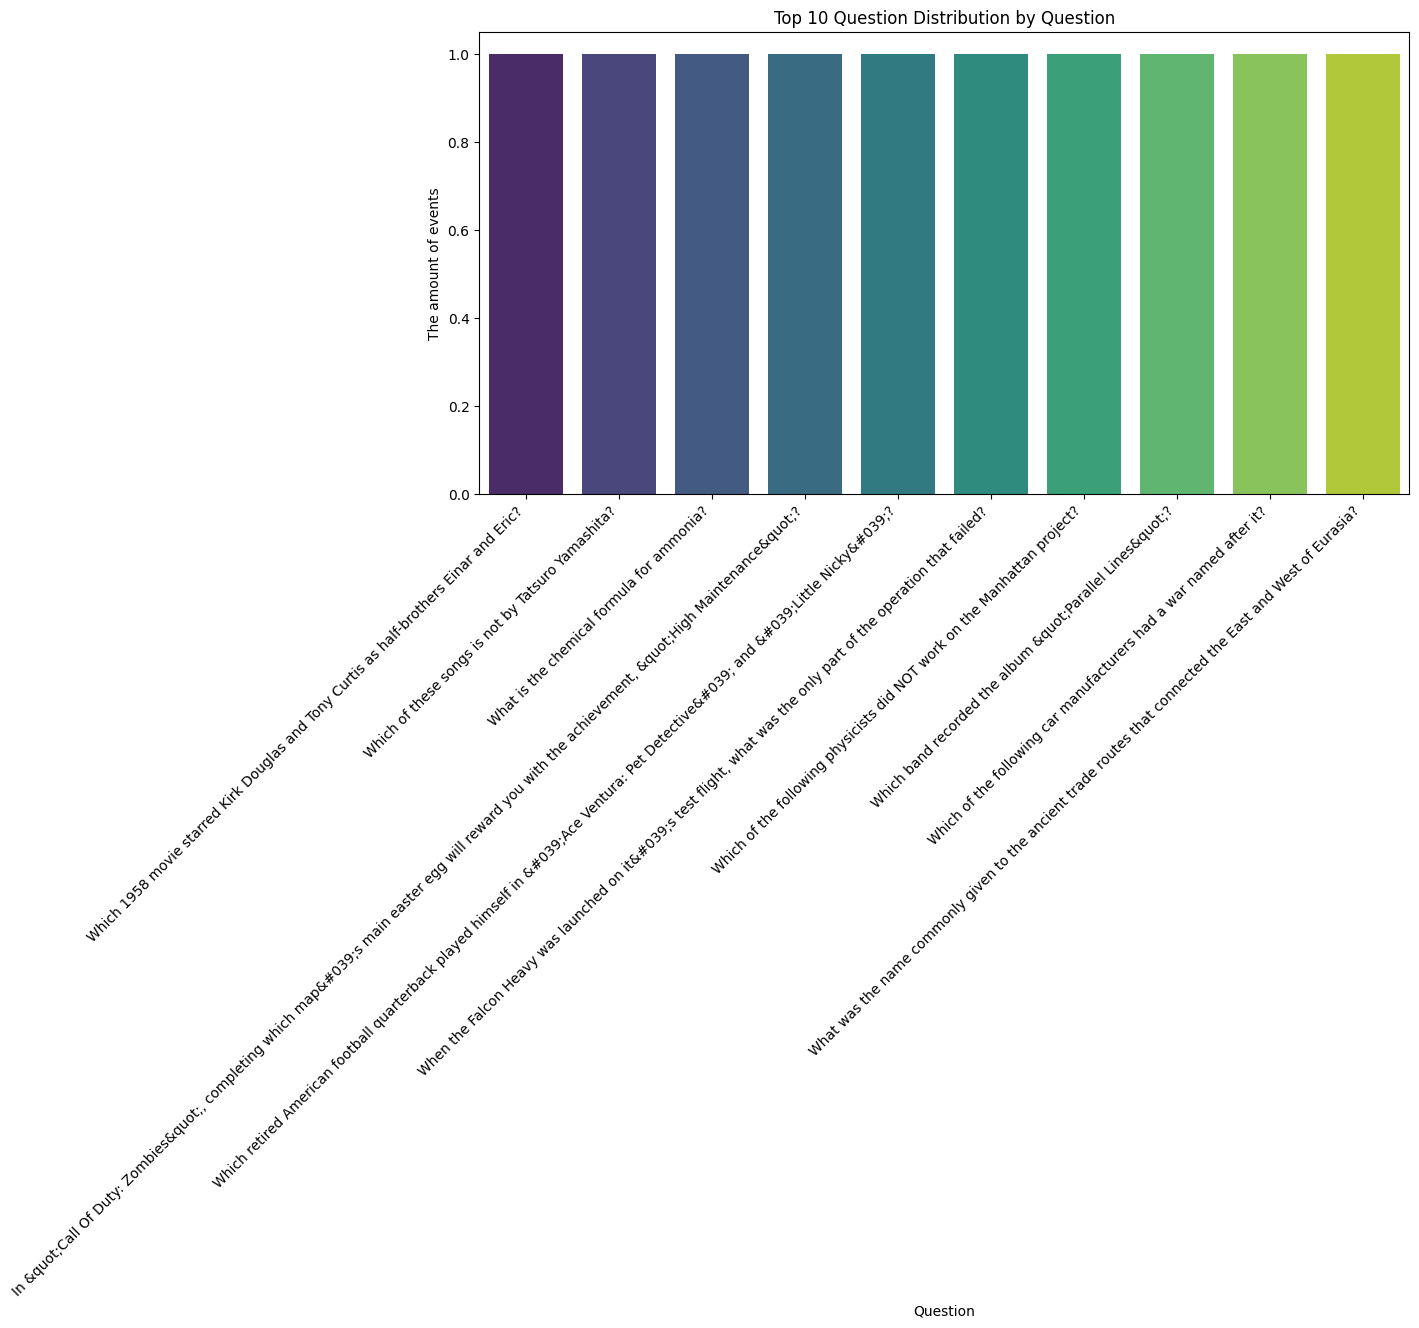

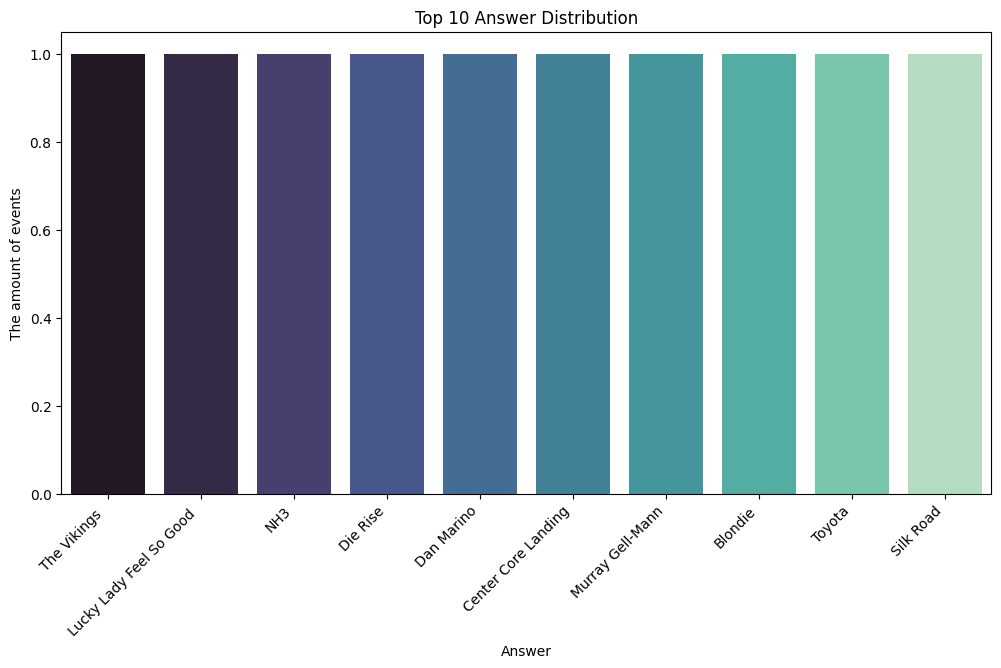

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Main script.
from src.web_data.api_handler import ApiHandler

# Put the dataset in.
data = api_handler.get_data(amount=100)  # Adjust amount as needed
formatted_data = api_handler.format_data(data)

# Print the names of the columns.
print(formatted_data.columns)

# Analysis
# 1. Question Distribution
top_questions = 10  
top_question_counts = formatted_data['Question'].value_counts().head(top_questions)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_question_counts.index, y=top_question_counts.values, palette="viridis")
plt.title(f'Top {top_questions} Question Distribution by Question')
plt.xlabel('Question')
plt.ylabel('The amount of events')
plt.xticks(rotation=45, ha='right')
plt.show()

# 2. Answer Analysis
top_answers = 10  
top_answer_counts = formatted_data['Answer'].value_counts().head(top_answers)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_answer_counts.index, y=top_answer_counts.values, palette="mako")
plt.title(f'Top {top_answers} Answer Distribution')
plt.xlabel('Answer')
plt.ylabel('The amount of events')
plt.xticks(rotation=45, ha='right')
plt.show()


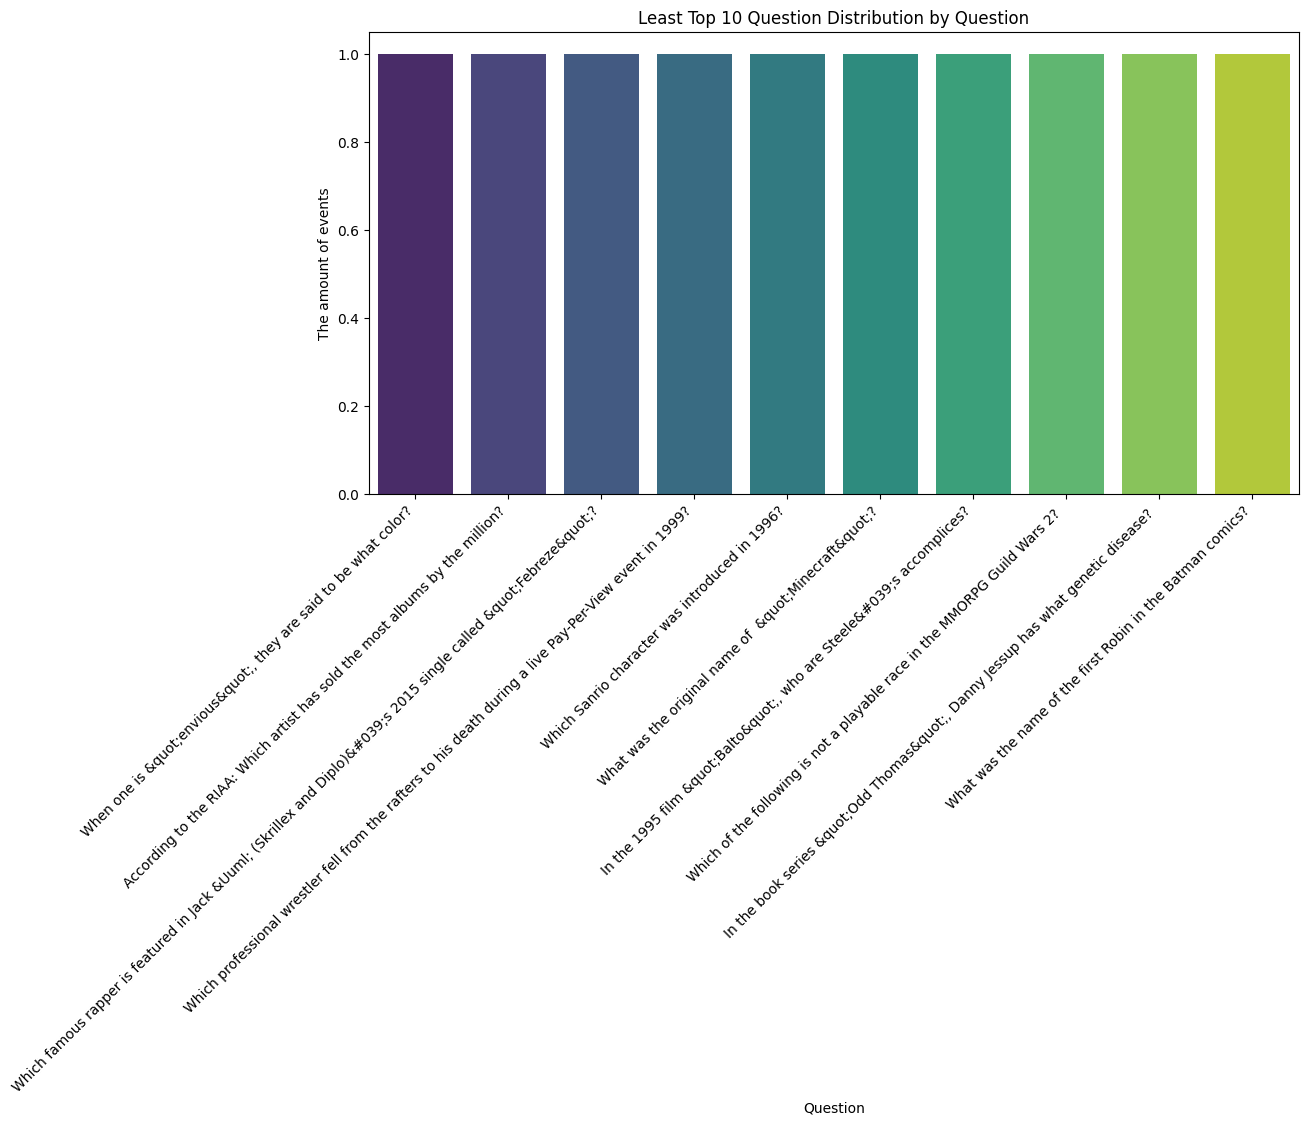

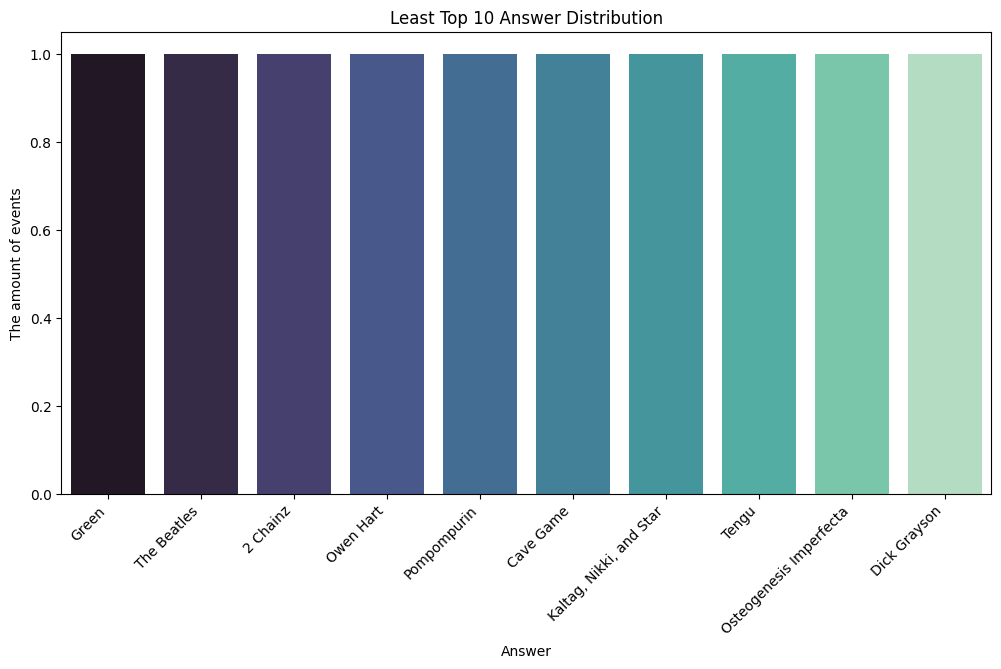

In [24]:
# 1. Question Analysis (Least Top 10)
least_top_questions = 10  
least_top_question_counts = formatted_data['Question'].value_counts().tail(least_top_questions)

plt.figure(figsize=(12, 6))
sns.barplot(x=least_top_question_counts.index, y=least_top_question_counts.values, palette="viridis")
plt.title(f'Least Top {least_top_questions} Question Distribution by Question')
plt.xlabel('Question')
plt.ylabel('The amount of events')
plt.xticks(rotation=45, ha='right')
plt.show()

# 2. Answer Analysis (Least Top 10)
least_top_answers = 10  
least_top_answer_counts = formatted_data['Answer'].value_counts().tail(least_top_answers)

plt.figure(figsize=(12, 6))
sns.barplot(x=least_top_answer_counts.index, y=least_top_answer_counts.values, palette="mako")
plt.title(f'Least Top {least_top_answers} Answer Distribution')
plt.xlabel('Answer')
plt.ylabel('The amount of events')
plt.xticks(rotation=45, ha='right')
plt.show()


### Top 10 Question Distribution:
The distribution of the questions in the dataset is seen in this plot. We concentrate on the most commonly asked questions by choosing the top 10. This is useful because it enables us to pinpoint the repeating themes or prominent subjects in the sample. It offers a brief synopsis of the queries that may be asked more frequently, which helps to clarify the content of the dataset.

### Least Top 10 Question Distribution:
On the other hand, we can investigate the less common or distinctive features of the dataset by looking at the distribution of the least popular ten items. Despite being less common, these inquiries can reveal obscure trends, anomalies, or specialized subjects that may be just as significant but less obvious in the full dataset. 

### Answer Analysis:
In the same way, the answer distribution plot illustrates how frequently each response appears in the dataset. Selecting the top 10 answers enables us to identify the responses that appear the most frequently in all of the questions. This data is important because it illuminates trends in the dataset, showing which answers are more commonly linked to particular queries. It provides insights into the diversity or commonality of answers in the dataset and helps find popular or repeating responses.


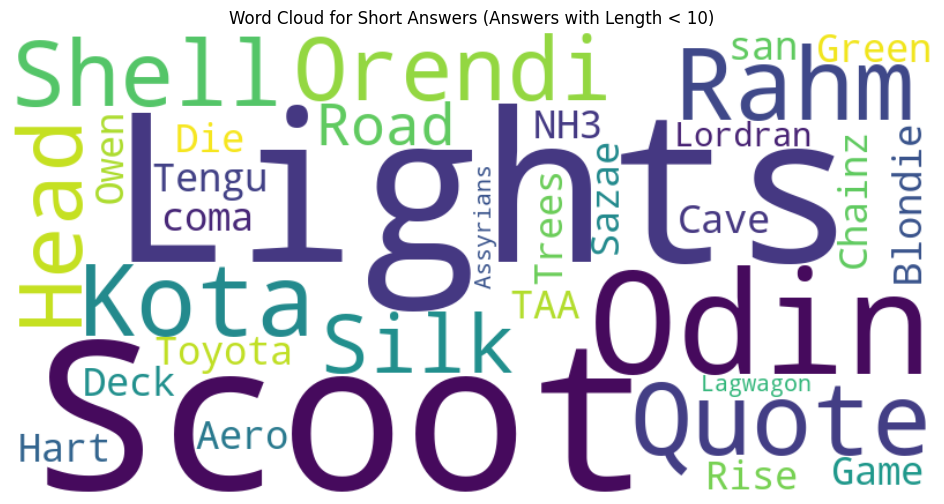

In [25]:
from wordcloud import WordCloud

# 1. Short Answer Analysis
short_answer_length = 10  # Set the threshold for short answers
short_answer_counts = formatted_data['Answer'][formatted_data['Answer'].str.len() < short_answer_length].value_counts()
all_short_answers = ' '.join(short_answer_counts.index)

# Produce a word cloud.
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_short_answers)

# Make the word cloud visible with matplotlib.
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for Short Answers (Answers with Length < {short_answer_length})')
plt.show()

### Short Answer Analysis: 
    We can pay particular attention to the distribution of short answers throughout the dataset, in addition to looking at the questions with the highest and lowest scores. Short replies frequently offer brief and straightforward answers, and examining their frequency might provide light on the features of the dataset.

## - [Web Scraping](#third-bullet)

In [ ]:
# main_script.py
from src.web_data.web_scraper import WebScraper

def main():
    # Create an instance of the WebScraper class
    scraper = WebScraper(base_url="https://markets.ft.com/data")

    # Scrape data from the website
    scraped_data = scraper.scrape_data()

    # Display the scraped data
    print(scraped_data.head())

if __name__ == "__main__":
    main()

## - [References](#fourth-bullet)


- [Requests Library Documentation](https://docs.python-requests.org/en/latest/)
- [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [xml.etree.ElementTree Documentation](https://docs.python.org/3/library/xml.etree.elementtree.html)
- [Open Trivia Database API Documentation](https://opentdb.com/api_config.php)
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
- [Seaborn Documentation](https://seaborn.pydata.org/)
- [WordCloud Documentation](https://www.datacamp.com/tutorial/wordcloud-python)

## Additional Resources: 

- [W3Schools - XML Tutorial](https://www.w3schools.com/xml/)
- [Open Trivia Database](https://opentdb.com/)
- [Apple Robots.txt](https://www.apple.com/robots.txt)
- [Real Python](https://realpython.com/)
- [Real Python](https://realpython.com/python-web-scraping-practical-introduction/)


